<a href="https://colab.research.google.com/github/UlisesGonzalezP/GoogleColab/blob/master/AjustePolinomial_AlgebraLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Algoritmo de aproximación polinomial de grado 3
import numpy as np #Importa libreria numpy como np

def polyfit2(x,y,n):#Define la función polyfit
  def inv(A):
    return np.linalg.inv(A)#Matriz inversa de la matriz A
  def trans(A):
    return A.getT()#Transpuesta de la matriz A
  def prod(A,B):
    return np.dot(A,B)#Producto punto entre los vectores A y B

  xlen = len(x)#Calcula la longitud del vector x
  ylen = len(y)#Calcula la longitud del vector y
  one = np.ones((xlen,n+1),dtype=int)#Matriz de 1 de dimensiones (xlen,n+1)
  c1=one[:,[1]]#Seleccionamos sólo la columna 1 de la matriz one 
  xT=np.matrix(x)#Convierte los datos a una matriz de numpy
  yT=np.matrix(y)#Convierte los datos a una matriz de numpy
  c2=xT.getT()#Seleccionamos la columna 2 de la matriz (x a la 1er potencia)
  c3=np.power(c2,2)#Eleva al cuadrado los elementos de la matriz c2
  c4=np.power(c2,3)#Eleva al cubo los elementos de la matriz c2
  A=np.hstack([c1,c2,c3,c4])#Agrupa las columnas c1, c2, c3, c4 en una matriz A
  ajuste = prod(prod(inv(prod(trans(A),A)),trans(A)),trans(yT))#La función prod realiza los productos de las matrices que recibe como argumentos
  print(ajuste)

x=[1.0,-2.0,3.0,4.0]#Datos extraidos del ejemplo 2 de la sección 6.2 del libro de Grossman Stanley "Aplicaciones de álgebra lineal", Iberoamérica, 1988
y=[4.0,5.0,-1.0,1.0]

polyfit2(x,y,2)#El resultado del mejor polinomio de ajuste es de grado 3 y es el polinomio y=0.32x^3 - 1.07x^2 - 2.37x +7.13

[[ 7.13333333]
 [-2.37777778]
 [-1.07777778]
 [ 0.32222222]]


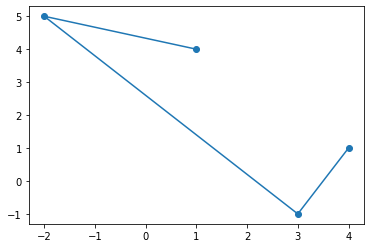

In [45]:
#Algoritmo de ajuste polinomial automático por función.
#Este modulo sirve para encontrar visualmente el grado de mejor ajuste polinomial a los datos dados.
from sklearn.linear_model import LinearRegression #De linear_model de sklearn importamos LinearRegression
from sklearn.preprocessing import PolynomialFeatures #De preprocessing importamos PolynomialFeatures
import matplotlib.pyplot as plt #Importamos libreria matplotlib y asignamos a plt
import pandas as pd #Importamos libreria pandas y asignamos a pd

url = 'https://raw.githubusercontent.com/UlisesGonzalezP/GoogleColab/master/XyData.csv'#Importa los datos a utilizar desde github
dataset = pd.read_csv(url) #Se almacenan dichos datos en la variable dataset

X = dataset.iloc[:,:-1].values #Se selecciona la primer columna y se asigna en X
y = dataset.iloc[:,1].values #Se selecciona la segunda columna y se asigna en y

lin_reg = LinearRegression()#Se asigna a lin_reg la función LinearRegression
poly_reg = PolynomialFeatures(degree=3)#Asigna el grado de un polinomio a poly_reg mediante PolynomialFeatures

#Ajuste de la regresión polinomial al ajuste de datos en X, y
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
lin_reg.fit(X_poly,y)

#Visualización de resultados de la regresión lineal
plt.scatter(X,y)
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)))
plt.show()
#Visualmente se observo que el mejor grado de ajuste polinomial fue para el grado 3, debido a que toca todos los puntos de la recta, para grados superiores se observa el mismo resultado y para grados inferiores, toca menos puntos en la recta.